Primero cargaremos todo las librerias que usaremos

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

songs= pd.read_csv('../spotify_songs.csv')
songs.head()


,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,2001-01-01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,...,-10.068,1,0.0236,0.27900,0.01170,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,...,-4.739,1,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,...,-7.504,0,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,en
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,2012-10-29,Christmas Soul,6FZYc2BvF7tColxO8PBShV,...,-5.819,0,0.0341,0.68900,0.00000,0.0664,0.405,118.593,243067,en
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,...,-1.993,1,0.0409,0.03700,0.00000,0.1380,0.240,130.018,193160,en


In [35]:
essential = songs[["track_name", "track_artist", "lyrics"]]
essential.head()

,track_name,track_artist,lyrics
0,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...
1,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu..."
2,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U..."
3,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...
4,Dumb Litty,KARD,Get up out of my business You don't keep me fr...


In [36]:
essential = essential.dropna()
essential = essential.drop_duplicates()
essential.shape

(16898, 3)

In [37]:
vectorizer = TfidfVectorizer()
vectorizer
X = vectorizer.fit_transform(essential["lyrics"])

print(X)

  (0, 6571)	0.036978791711044644
  (0, 41136)	0.05032055613157776
  (0, 61405)	0.12082006309652044
  (0, 56662)	0.2518074776863153
  (0, 6411)	0.13898949756748447
  (0, 2605)	0.20905959947270278
  (0, 57671)	0.2242589240121492
  (0, 43221)	0.20128222452631103
  (0, 47715)	0.23442627550542364
  (0, 45330)	0.18847287653374725
  (0, 54876)	0.1981436618165529
  (0, 85304)	0.24164012619304087
  (0, 55730)	0.05860656887635591
  (0, 49099)	0.06295186942157882
  (0, 43031)	0.10150613709625535
  (0, 88291)	0.05509836909335059
  (0, 20980)	0.05860656887635591
  (0, 44887)	0.0560647310030373
  (0, 38214)	0.03640849476903312
  (0, 12123)	0.06295186942157882
  (0, 5570)	0.014116325933882944
  (0, 51588)	0.06295186942157882
  (0, 34517)	0.06041003154826022
  (0, 46582)	0.04302882936736855
  (0, 45331)	0.10064111226315552
  :	:
  (16897, 94694)	0.06748544937654348
  (16897, 37446)	0.03283440574792395
  (16897, 50263)	0.02804385943146021
  (16897, 59795)	0.06363010739706945
  (16897, 72002)	0.03634111

In [42]:
def KNN_secuencial(query, k):
    query_vec = vectorizer.transform([query])
    results = cosine_similarity(X,query_vec).reshape((-1,))
    top_k_indices = results.argsort()[-k:][::-1]
    top_k_songs = essential.iloc[top_k_indices][["track_name", "track_artist"]]
    return top_k_songs
query = "I'm a rebel just for kicks, now"
k=5
print(KNN_secuencial(query, k))




                                 track_name       track_artist
15794                         Feel It Still  Portugal. The Man
2006    It's All on U - T-Mass & LZRD Remix           ILLENIUM
8709   It's All on U (feat. Liam O'Donnell)           ILLENIUM
15720           Rebel Rebel - 2014 Remaster        David Bowie
14385           Rebel Rebel - 1999 Remaster        David Bowie


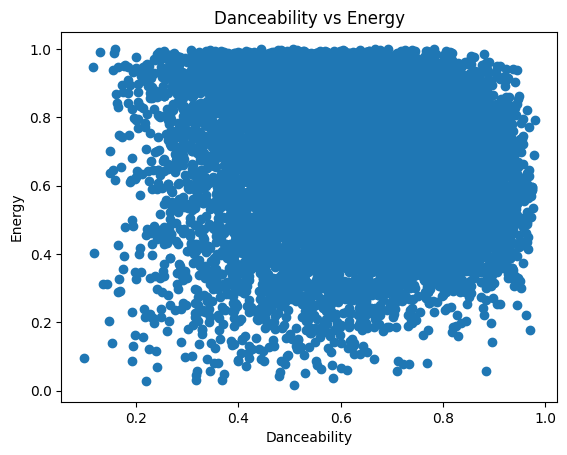

In [39]:
plt.plot(songs['danceability'], songs['energy'], 'o')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Danceability vs Energy')
plt.show()


In [45]:
import heapq
def KNN_secuencial_heap(query, k):
    query_vec = vectorizer.transform([query])
    results = cosine_similarity(X,query_vec).reshape((-1,))
    top_k_indices = heapq.nlargest(k, range(len(results)), results.take)
    top_k_songs = essential.iloc[top_k_indices][["track_name", "track_artist"]]
    return top_k_songs

print(KNN_secuencial_heap(query, k))

                                 track_name       track_artist
15794                         Feel It Still  Portugal. The Man
2006    It's All on U - T-Mass & LZRD Remix           ILLENIUM
8709   It's All on U (feat. Liam O'Donnell)           ILLENIUM
5462            Rebel Rebel - 2016 Remaster        David Bowie
12584           Rebel Rebel - 1997 Remaster        David Bowie


In [56]:
radius = 0.2
def KNN_range_Search(query, radius):
    query_vec = vectorizer.transform([query])
    results = cosine_similarity(X, query_vec).reshape((-1,))
    indices = np.where(results >= radius)[0]
    songs = essential.iloc[indices][["track_name", "track_artist"]]
    return songs

print(KNN_range_Search(query, radius))

                                 track_name       track_artist
2006    It's All on U - T-Mass & LZRD Remix           ILLENIUM
5462            Rebel Rebel - 2016 Remaster        David Bowie
8709   It's All on U (feat. Liam O'Donnell)           ILLENIUM
9937                              Pumped Up          Klingande
11489                               McQueen          TrifeDrew
12584           Rebel Rebel - 1997 Remaster        David Bowie
14385           Rebel Rebel - 1999 Remaster        David Bowie
15720           Rebel Rebel - 2014 Remaster        David Bowie
15786              Rebel Rebel - Remastered        David Bowie
15794                         Feel It Still  Portugal. The Man
16985                         Teenage Kicks     The Undertones
18306                       Pumped Up Kicks  Foster The People
